# Happiness Modeling (Summer 2021)
This summer, I endeavored to try and use statistics + data science to evaluate how my daily choices affect my average happiness. After recording 11 features of my day, plus a **"happiness"** score, I'm now working on building a model that reflects both my perception of my days as well as the numerical relationship among my collected data.

## 1.0 - Simple Multiple Regression and Reading In Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model as lm

In [12]:
happiness = pd.read_csv('Responsibility Sheet - Happiness Tracking Raw Data (1).csv')
happiness.describe()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,32.171429,3.000000,0.628571,8.50000,0.371429,2.085714,0.742857,0.762857,76.600000,3.285714,7.771429
std,37.828938,0.594089,0.475006,0.83137,0.490241,1.437347,1.045800,0.150168,6.950243,3.169908,1.313632
min,4.000000,1.500000,0.000000,6.00000,0.000000,0.000000,0.000000,0.300000,62.000000,0.000000,4.000000
25%,12.500000,3.000000,0.000000,8.00000,0.000000,1.000000,0.000000,0.700000,70.000000,0.000000,7.000000
50%,20.000000,3.000000,1.000000,9.00000,0.000000,2.000000,0.000000,0.800000,75.000000,4.000000,8.000000
75%,30.000000,3.500000,1.000000,9.00000,1.000000,3.000000,1.000000,0.900000,80.000000,6.000000,9.000000
max,200.000000,4.000000,1.000000,10.00000,1.000000,5.000000,4.000000,1.000000,92.000000,8.000000,9.000000


In [13]:
happiness = happiness.drop('Date', axis = 1)
happiness.head()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
0,20,2.0,1.0,9.0,1,2.0,3.0,0.8,62,0.0,9.0
1,200,3.0,1.0,8.0,0,2.0,1.0,0.5,70,0.0,7.0
2,10,3.0,0.0,7.0,1,0.0,0.5,0.9,92,0.0,8.0
3,20,4.0,0.0,10.0,0,0.0,0.0,1.0,90,0.0,9.0
4,8,3.0,1.0,6.0,0,2.0,0.0,0.4,80,0.0,9.0


In [14]:
X = happiness.drop('Happiness?', axis = 1)
X.head()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship
0,20,2.0,1.0,9.0,1,2.0,3.0,0.8,62,0.0
1,200,3.0,1.0,8.0,0,2.0,1.0,0.5,70,0.0
2,10,3.0,0.0,7.0,1,0.0,0.5,0.9,92,0.0
3,20,4.0,0.0,10.0,0,0.0,0.0,1.0,90,0.0
4,8,3.0,1.0,6.0,0,2.0,0.0,0.4,80,0.0


In [15]:
y = happiness['Happiness?']

In [16]:
cols = happiness.columns.tolist()

In [17]:
model = lm.LinearRegression()

In [18]:
model.fit(X, y)

LinearRegression()

In [19]:
model.coef_

array([-0.00346198,  0.97488214,  0.59314289, -0.278469  ,  0.44655544,
        0.02423806,  0.12286633,  1.75817728, -0.01601469, -0.15895293])

In [20]:
for name, coef in zip(cols, model.coef_):
    print(name, ':', coef)
print('with intercept =', model.intercept_)

People Seen : -0.003461980507812812
Meals Eaten : 0.9748821381671018
Catherine : 0.5931428903471263
Hours of sleep : -0.2784690000349242
Workout? : 0.4465554367944105
Hours of Classes : 0.024238061266047828
Hours of music : 0.12286633219258714
Weather (rain = 0 to sun = 1) : 1.7581772829006244
Average (Day) Temperature : -0.016014689069799526
Hours of project/internship : -0.15895293275696215
with intercept = 7.052384596828146


In [21]:
cathpiness = happiness.groupby('Catherine').mean()
cathpiness

,People Seen,Meals Eaten,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Catherine,,,,,,,,,,
0.0,24.666667,2.958333,8.583333,0.416667,2.583333,0.583333,0.741667,79.500000,4.000000,7.166667
0.5,17.500000,3.500000,8.500000,0.000000,1.500000,0.000000,0.725000,85.000000,2.500000,8.000000
1.0,37.857143,2.976190,8.452381,0.380952,1.857143,0.904762,0.778571,74.142857,2.952381,8.095238


In [22]:
# There are too few 0.5's for them to be their own class, so they're reasonably being absorbed by class 0
happiness2 = happiness.copy()
happiness2['Adjusted Catherine'] = happiness2['Catherine'].replace(0.5, 0)
happiness2.groupby('Adjusted Catherine').mean()

,People Seen,Meals Eaten,Catherine,Hours of sleep,Workout?,Hours of Classes,Hours of music,Weather (rain = 0 to sun = 1),Average (Day) Temperature,Hours of project/internship,Happiness?
Adjusted Catherine,,,,,,,,,,,
0.0,23.642857,3.035714,0.071429,8.571429,0.357143,2.428571,0.500000,0.739286,80.285714,3.785714,7.285714
1.0,37.857143,2.976190,1.000000,8.452381,0.380952,1.857143,0.904762,0.778571,74.142857,2.952381,8.095238


Text(0.5, 1.0, 'Singular Values of Happiness')

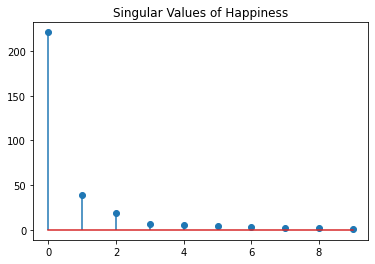

In [23]:
plt.stem(model.singular_)
plt.title('Singular Values of Happiness')

## 2.0 - Pivoting to More Advanced Modeling

In [24]:
def comparemodels():
    plt.bar(modelscoredict.keys(), modelscoredict.values())
    plt.title('R^2 Values for All Models So Far');
    
def addmodel(name, model):
    modelscoredict[name] = model.score(X, y)

In [25]:
ridgemodel = lm.Ridge()

In [26]:
ridgemodel.fit(X, y)

Ridge()

In [27]:
ridgemodel.coef_

array([-0.00453249,  0.9439981 ,  0.55645679, -0.26025388,  0.38239457,
       -0.03098545,  0.13635724,  0.66618246, -0.01553825, -0.13976937])

In [28]:
modelscoredict = {}
addmodel('Least Squares', model)
model.score(X,y)

0.5501270353578023

In [29]:
addmodel('Ridge', ridgemodel)
ridgemodel.score(X, y)

0.5363989746189898

Average (Day) Temperature  had the largest change, from  -0.016014689069799526  to  -0.015538250110524928


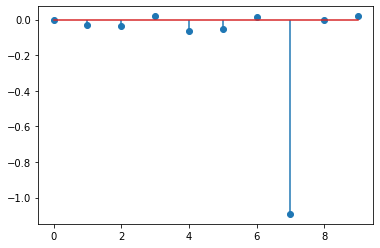

In [30]:
plt.stem(ridgemodel.coef_ - model.coef_)
print(cols[8] , ' had the largest change, from ', model.coef_[8], ' to ', ridgemodel.coef_[8])

Text(0.5, 1.0, 'Least Squares Coefficients vs. Ridge Coefficients')

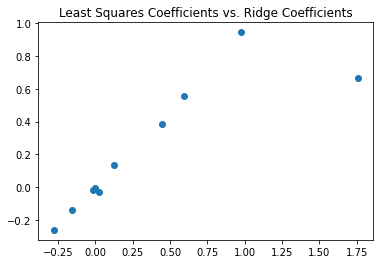

In [31]:
plt.scatter(model.coef_, ridgemodel.coef_)
plt.title('Least Squares Coefficients vs. Ridge Coefficients')

In [32]:
for name, coef in zip(cols, ridgemodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.004532488758127473
Meals Eaten : 0.9439981037857401
Catherine : 0.5564567936256996
Hours of sleep : -0.260253879938846
Workout? : 0.3823945660488652
Hours of Classes : -0.03098544796799061
Hours of music : 0.13635724158681367
Weather (rain = 0 to sun = 1) : 0.6661824561415302
Average (Day) Temperature : -0.015538250110524928
Hours of project/internship : -0.1397693654504554
with intercept = 7.910206723488625


In [33]:
elasticmodel = lm.ElasticNet()

In [34]:
elasticmodel.fit(X, y)

ElasticNet()

In [35]:
elasticmodel.coef_

array([-0.00480327,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.03384132, -0.05963745])

In [36]:
addmodel('Elastic', elasticmodel)
elasticmodel.score(X, y)

0.10423478480536941

In [37]:
testarr = [1,2,3,4,5,6]
testarr.index(max(testarr))

5

Weather (rain = 0 to sun = 1)  had the largest change, from  1.7581772829006244  to  0.0


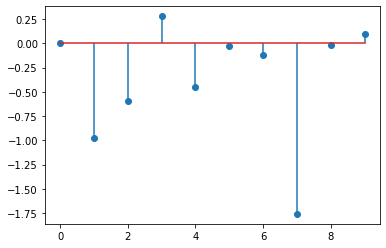

In [38]:
changes = elasticmodel.coef_ - model.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', model.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

Meals Eaten  had the largest change, from  0.9439981037857401  to  0.0


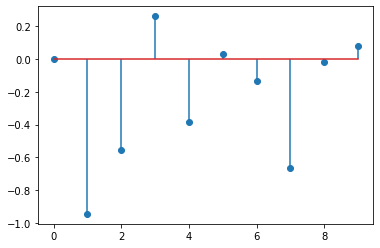

In [39]:
changes = elasticmodel.coef_ - ridgemodel.coef_
plt.stem(changes);
changesmag = (abs(changes)).tolist()
biggestdiff = changesmag.index(max(changesmag))
print(cols[biggestdiff] , ' had the largest change, from ', ridgemodel.coef_.tolist()[biggestdiff], ' to ', elasticmodel.coef_.tolist()[biggestdiff])

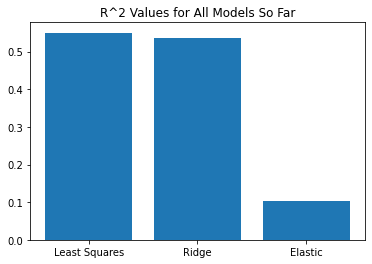

In [40]:
comparemodels()

In [41]:
for name, coef in zip(cols, elasticmodel.coef_):
    print(name, ':', coef)
print('with intercept =', ridgemodel.intercept_)

People Seen : -0.004803266444739322
Meals Eaten : 0.0
Catherine : 0.0
Hours of sleep : -0.0
Workout? : 0.0
Hours of Classes : -0.0
Hours of music : 0.0
Weather (rain = 0 to sun = 1) : 0.0
Average (Day) Temperature : -0.033841318690431374
Hours of project/internship : -0.059637454868311894
with intercept = 7.910206723488625


## 3.0 - Testing the Models

In [46]:
# Extreme test cases and Regular test cases to Explore general Viability
myworstday = np.array([0, 1, 0, 5, 0, 10, 0, 0, 30, 10]).reshape(1, -1)
mybestday = np.array([100, 3, 1, 9, 1, 5, 2, 1, 70, 0]).reshape(1, -1)
anaverageday = np.array([40, 3, 1, 8, 1, 8, 1, 0.8, 75, 0]).reshape(1, -1)
highschoolavg = np.array([50, 3, 0, 8, 0, 6, 2, 0.7, 90, 0]).reshape(1, -1)
tomorrowprob = np.array([20, 3, 1, 9, 1, 2, 1, 0.8, 70, 7]).reshape(1, -1)
tests = [myworstday, mybestday, anaverageday, highschoolavg, tomorrowprob]
target = np.array([5, 10, 8, 8, 9])

In [47]:
model.predict(myworstday)[0]

4.807332347817498

In [48]:
target[tests.index(myworstday)]

5

In [49]:
modelperformance = []
rawmodelperformance = []
for arch in [model, ridgemodel, elasticmodel]:
    temp = 0
    templist = []
    targetindex = 0
    for arr in tests:
        score = arch.predict(arr)[0] - target[targetindex]
        temp += score
        templist.append(score)
        targetindex += 1
    modelperformance.append(temp)
    rawmodelperformance.append(templist)

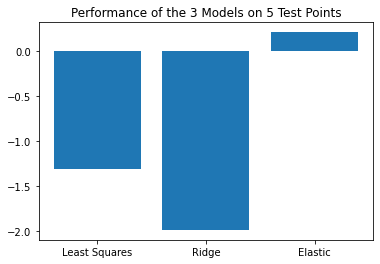

In [50]:
plt.bar(modelscoredict.keys(), modelperformance)
plt.title('Performance of the 3 Models on 5 Test Points');

In [51]:
# Interestingly enough, Elastic actually performs best in the long run! Although its individual predictions are worse


In [52]:
rawmodelperformance[0][0], rawmodelperformance[1][0], rawmodelperformance[2][0]

(-0.19266765218250193, 0.3792397900799269, 4.102539054480479)

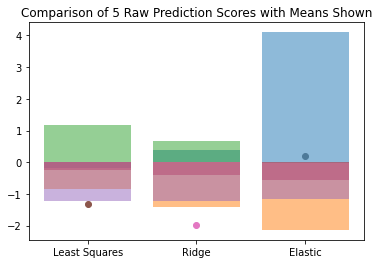

In [53]:
for i in np.arange(5):
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
plt.scatter(0, modelperformance[0])
plt.scatter(1, modelperformance[1])
plt.scatter(2, modelperformance[2])
plt.title('Comparison of 5 Raw Prediction Scores with Means Shown');

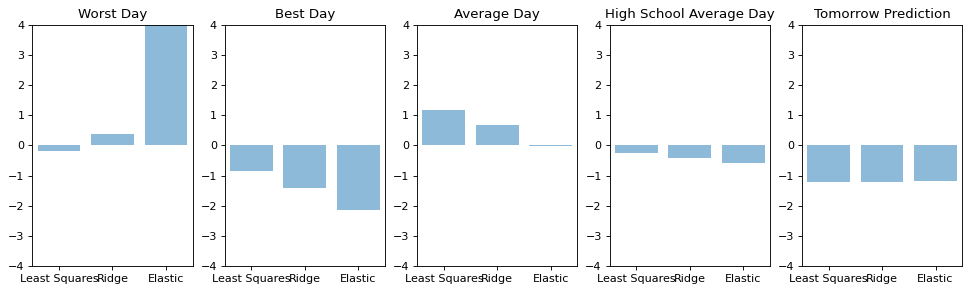

In [54]:
#Now separately
plt.figure(figsize=(15, 4), dpi=80)
testnames = ['Worst Day', 'Best Day', 'Average Day', 'High School Average Day', 'Tomorrow Prediction']
for i in np.arange(5):
    plt.subplot(1, 5, i+1)
    plt.bar(modelscoredict.keys(), [rawmodelperformance[0][i], 
                                    rawmodelperformance[1][i],
                                    rawmodelperformance[2][i]], alpha = 0.5)
    plt.title(testnames[i])
    plt.axis((-0.5, 2.5, -4, 4))